### Modeling and simulation

- What is a system?
- What is a model?
- What is a simulation?
- What is the difference between deterministic and stochastic?
- What are discrete and continuous variables?

### 1D Random Walk 

- Implement a 1D random walk (a particle move in a 1D space)
  - In one dimension the particle move **up or down** randomly with equal probability.
  - The walks occurs for a given **number of steps**. 

![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/rwbarriers.png)

- There is a **reflecting barrier (green)**. If the particle collides with the reflecting barrier, the next step is up. 

- There is an **absorbing barrier (red)**. If the particle collides with the abasorbing barrier the walk ends. 
  - The particle disappears (dies). 

- **Enumerate:**
  - The input (independent) variables of the system. This is how you set up your system. 
  - The output (dependent) variables of the system. This is what you observe according to the system setup. 

- **What type of system are you modeling/observing?**

In [ ]:
# Start writing code here...
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

- https://en.wikipedia.org/wiki/Continuous_uniform_distribution

![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/Uniform_Distribution_PDF_SVG.svg/320px-Uniform_Distribution_PDF_SVG.svg.png)

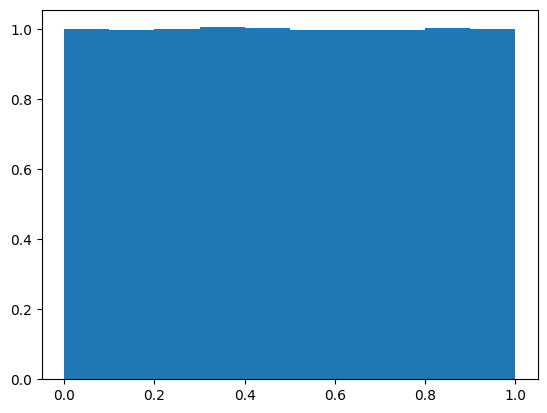

In [ ]:
plt.hist(np.random.random(size=1000000), density=True);

In [ ]:
(np.random.random(size=10)*2).astype(int)*2-1

array([-1,  1, -1,  1,  1,  1,  1,  1, -1,  1])

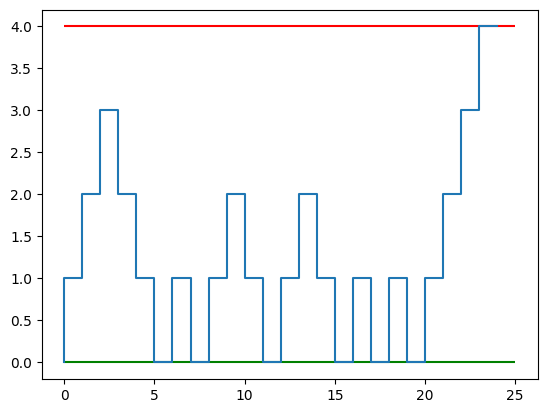

In [ ]:
start = 0
reflecting_barrier = 0
absorbing_barrier = 4

def make_walk(start, absorbing_barrier, reflecting_barrier=0):
    walk = [start]
    while True:
        if walk[-1] == absorbing_barrier:
            break
        if walk[-1] == reflecting_barrier:
            walk += [1]
        walk += [walk[-1] + int(np.random.random()*2)*2-1]
    return walk

walk = make_walk(absorbing_barrier=4, start=0)

plt.hlines(reflecting_barrier, 0, len(walk), colors='g')
plt.hlines(absorbing_barrier, 0, len(walk), colors='r')

plt.step(range(len(walk)), walk)



In [ ]:
walk = make_walk(absorbing_barrier=4, start=0)
walk, len(walk)

([0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 3, 2, 3, 4], 15)

In [ ]:
np.array([len(make_walk(absorbing_barrier=4, start=0)) - 1 for i in range(10000)]).mean()

15.8868

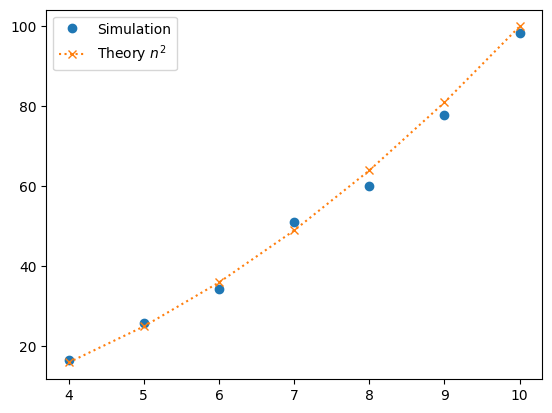

In [ ]:
n = np.array([4, 5, 6, 7, 8, 9, 10])
mw = []  # mean life
sims = 100
walks_total = np.array([])
for ni in n:
    walks_n = np.array([len(make_walk(absorbing_barrier=ni, 
    start=0)) - 1 for i in range(sims)])
    mw += [walks_n.mean()]
    walks_total = np.concatenate((walks_total, walks_n))
plt.plot(n, mw, "o", label="Simulation")  # Simulation
plt.plot(n, n**2, ":x", label=r"Theory $n^2$")  # Theory 
plt.legend();

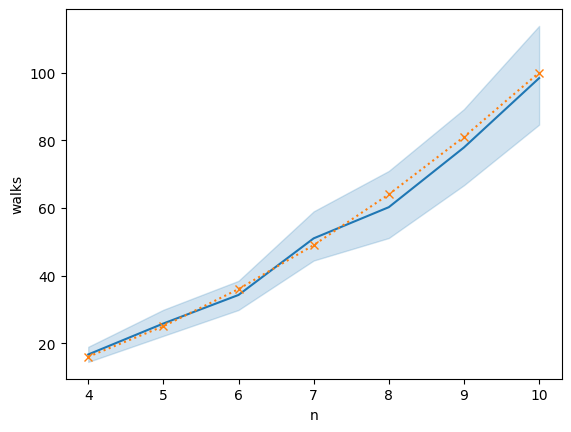

In [ ]:
data = pd.DataFrame({'walks': walks_total, 'n': np.array([[str(ni)]*sims for ni in n]).flatten()})
sns.lineplot(data=data, x='n', y='walks', err_style="band", errorbar=('ci', 95))  # Simulation
plt.plot(n**2, ":x", label=r"Theory $n^2$")  # Theory 

In [ ]:
walk_n4 = np.array([len(make_walk(absorbing_barrier=4, start=0)) - 1 for i in range(1000)])

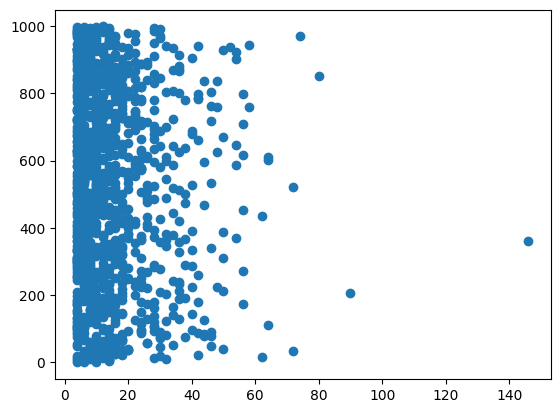

In [ ]:
plt.plot(walk_n4, range(len(walk_n4)), 'o')

<BarContainer object of 35 artists>

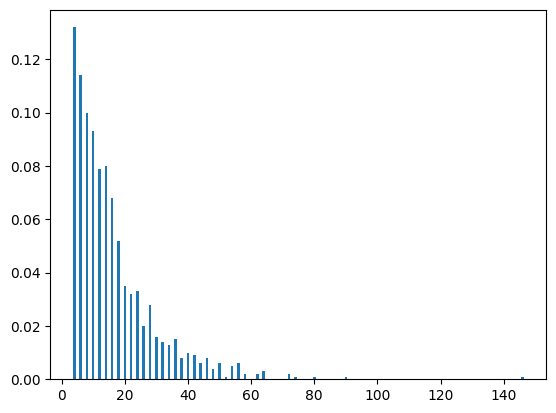

In [ ]:
x, fx = np.unique(walk_n4, return_counts=True)
plt.bar(x, fx/fx.sum())

(array([439., 279., 100.,  78.,  36.,  33.,  11.,  13.,   5.,   3.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  4. ,  11.1,  18.2,  25.3,  32.4,  39.5,  46.6,  53.7,  60.8,
         67.9,  75. ,  82.1,  89.2,  96.3, 103.4, 110.5, 117.6, 124.7,
        131.8, 138.9, 146. ]),
 <BarContainer object of 20 artists>)

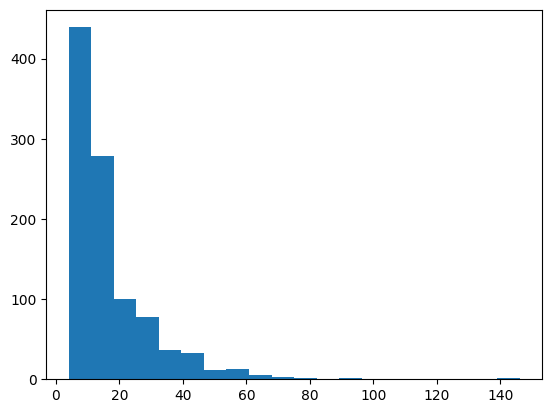

In [ ]:
plt.hist(walk_n4, bins=20)

<AxesSubplot:>

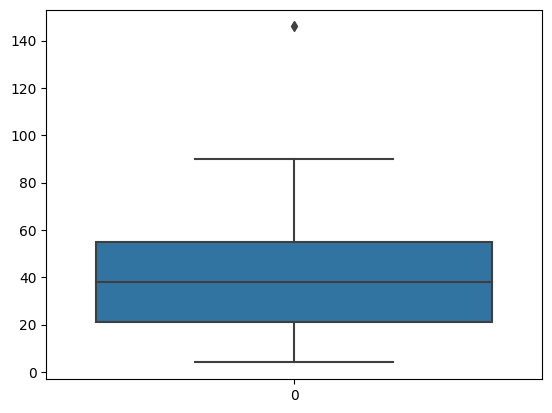

In [ ]:
import seaborn as sns
sns.boxplot(x)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6270f206-ff88-4533-afc5-e2a8c2de37fb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>